# Preliminary Stuff

## Overview

Make the world a safer place by identifying distracted drivers ✌
- Using VGG16 pretrained network
- Data set : https://www.kaggle.com/c/state-farm-distracted-driver-detection

## Prerequisites

### Download + Unzip Data

- StateFarm Data Set : https://www.kaggle.com/c/state-farm-distracted-driver-detection
- Place unzipped contents in ./data/ folder relative to this notebook's current folder

### Copy a small sample of the data for testing

Copy first 10 images from each category to a sample folder with same structure

In [44]:
import shutil
import os

trainRoot, testRoot, sampleRoot = 'data/train/', 'data/test/', 'data/sample/'
numFiles = 100

def copyNumFiles(srcFolder, destFolder, numFiles):
    files = os.listdir(srcFolder)
    for file in files[0:numFiles]:
        src = srcFolder+'/'+file
        dest = destFolder+'/'+file
        
        if not(os.path.isdir(destFolder)):
            os.makedirs(destFolder)
        
        shutil.copy2(src, dest)
        #print(src, ' -> ', dest)

# Copy Training Data
trainFolders = os.listdir(trainRoot)
for cur in trainFolders:
    copyNumFiles(trainRoot + cur, sampleRoot+'train/'+cur, numFiles)
    copyNumFiles(trainRoot + cur, sampleRoot+'valid/'+cur, numFiles)

copyNumFiles(testRoot, sampleRoot+'test/', numFiles)

Allows plots to be displayed right in the jupyter notebook

In [2]:
%matplotlib inline

Use path variable to easily switch between sub-sample (for speed) and full dataset

In [1]:
# For AWS Execution
#path = 'data/sample/'
#path = 'data'

# When running locally : 
path = '/media/angus/Windows/Users/mcleana/workspace/machine-learning/FastAI Course/Lesson 1/data/sample/'

# Begining

## Imports

Import / Initialize Libraries

In [3]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt

Import helper files from FastAI

In [1]:
import utils
from utils import plots

Using Theano backend.


In [2]:
# Import our class, and instantiate
import vgg16; reload(vgg16)
from vgg16 import Vgg16

Set the batch size

In [3]:
batch_size=64

# VGG16 Learning

In [4]:
vgg = Vgg16()
# Grab a few images at a time for training and validation.
# NB: They must be in subdirectories named based on their category
batches = vgg.get_batches(path+'train', batch_size=batch_size)
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size*2)

print('Starting training...')
vgg.finetune(batches)
print('Done finetune, starting .fit()')
vgg.fit(batches, val_batches, nb_epoch=1)
print('Done .fit()')

/home/angus/anaconda2/lib/python2.7/site-packages/keras/backend/theano_backend.py:1282: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode='max')
/home/angus/anaconda2/lib/python2.7/site-packages/keras/backend/theano_backend.py:1282: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  mode='max')
/home/angus/anaconda2/lib/python2.7/site-packages/keras/backend/theano_backend.py:1282: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  mode='max')


NameError: name 'path' is not defined

Now use model to predict images in test set

Found 1000 images belonging to 10 classes.


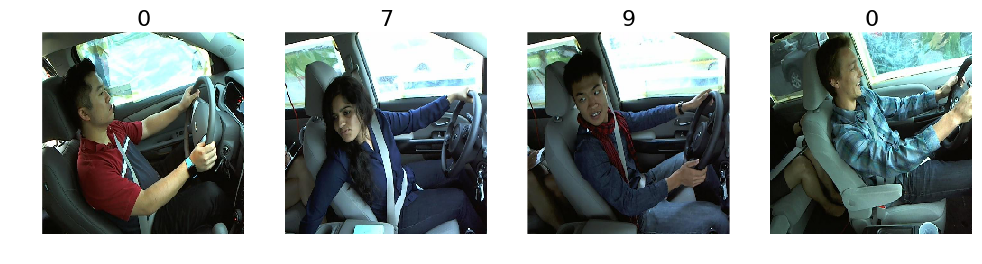

In [42]:
test_batches = vgg.get_batches(path+'valid', batch_size=4)
imgs,labels = next(test_batches)
categories = list(map(lambda arr: arr.index(1), labels.tolist()))
plots(imgs, titles=categories)

Predict these images

In [43]:
vgg.predict(imgs, True)

(array([ 0.4219,  0.4987,  0.366 ,  0.2947], dtype=float32),
 array([6, 6, 7, 3]),
 ['c6', 'c6', 'c7', 'c3'])